In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
csv_in = 'exchange-rate-twi.csv'
df = pd.read_csv(csv_in,sep=',',skiprows=2,header=0)
print(df.shape)
print(df.info())
display(df.head())

(304, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   304 non-null    object 
 1   Rate    299 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB
None


,Month,Rate
0,1970-05,100.0
1,1970-06,99.6
2,1970-07,NaN
3,1970-08,99.1
4,1970-09,99.2


In [12]:
print(df.isna().sum())

Month    0
Rate     5
dtype: int64


In [13]:
df = df.dropna().reset_index(drop=True)

In [14]:
df['Month'] = pd.to_datetime(df['Month'])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   299 non-null    datetime64[ns]
 1   Rate    299 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.8 KB
None


In [15]:
df = df.set_index('Month')
display(df.head())

,Rate
Month,
1970-05-01,100.0
1970-06-01,99.6
1970-08-01,99.1
1970-09-01,99.2
1970-10-01,99.2


In [16]:
df_resample_year = df.resample('Y').mean()
display(df_resample_year)

,Rate
Month,
1970-12-31,99.371429
1971-12-31,99.745455
1972-12-31,99.225000
1973-12-31,111.208333
1974-12-31,113.883333
1975-12-31,105.300000
1976-12-31,102.675000
1977-12-31,91.708333
1978-12-31,85.690909


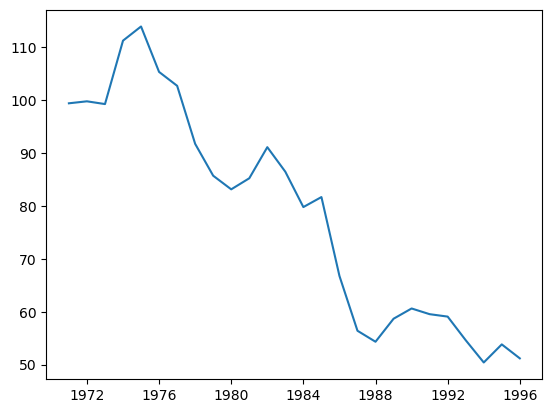

In [18]:
plt.plot(df_resample_year.index,df_resample_year['Rate'])
plt.show()